Gustavo Adolfo Hernández Galvis



Dado el modelo SIR

<div style="text-align: center">  $\frac {dS}{dt}= - \beta IS$ </div>
<div style="text-align: center">  $\frac {dR}{dt}=  \gamma I$ </div>
<div style="text-align: center">  $\frac {dI}{dt}=  \beta IS - \gamma I$, </div>

donde $\beta$ y $\gamma$, son las tasas de infección y recuperación respectivamente. Los grupos $S, I, R$ representan a los Suceptibles, Infectado y Recuperados. 

Lo que intentamos es agregar el grupo de personas muertas, por lo tanto el sistema de ecuaciones viene dado por

<div style="text-align: center">  $\frac {dS}{dt}= - \beta IS$ </div>
<div style="text-align: center">  $\frac {dI}{dt}=  \beta IS - \gamma I - \rho M$, </div>
<div style="text-align: center">  $\frac {dR}{dt}=  \gamma I$ </div>
<div style="text-align: center">  $\frac {dM}{dt}=  \rho I$ </div>

Donde  $M$ es el grupo de muertos  y $\rho$ la taza de muerte la cual depende de $\gamma$.

Observe que el cambio respecto al modelo SIR, es afectar el grupo de infectados, en el cual una persona infectada puede morir o recuperarse.

Vamos a suponer que la población susceptible es $S=0.95$, y la población de infectada es $I=0.05$.



In [18]:
'''Importamos las librerias numpy y matplotlib'''
import numpy as np
import matplotlib.pyplot as plt

'''
La función gráfica1, tiene como  parametros:

* times: array que inicia desde 0 y termina en 100, en pasos de dt
* I: Lista de infectados
* R: Lista de recuperados
* S: Lista de susceptibles
* M: Lista de fallecidos
* Resumen: Vizualización de los datos
'''

def grafica1(times, I, R, S, M):
    '''Creamos la figura'''
    plt.figure()
    
    '''Creamos las graficas para infectados, susceptibles y recuperados, con colores rojo,
    verde y negro respectivamente.'''
    plt.plot(times, I, 'r', label = 'Infectados')
    plt.plot(times, R, 'g', label = 'Recuperados')
    plt.plot(times, S, 'k', label = 'susceptibles')
    plt.plot(times, M, 'b', label = 'Muertos')
    
    
    plt.xlabel('Días')
    plt.ylabel('Población')
    plt.title('SIRM')
    
    '''Para mostar las etiquetas infectados, recuperados y susceptibles'''
    plt.legend()
   
    '''Mostrar la gráfica'''
    plt.show()
    

'''

La función new1, tiene como  parametros:

* beta: variable de tipo flotante, reresenta la tasa de infección.
* gamma: variable de tipo flotante, reresenta la tasa de recuperación.
* I: Lista de infectados.
* R: Lista de recuperados.
* S: Lista de susceptibles.
* M: Lista de fallecidos.
* dt: Variable flotante, que representa el cambio en el tiempo.
* Resumen: Formular el modelo


'''  
    
    
def new1(beta,gamma,R,I,S,M,dt):
    ro = gamma/5
    
    '''ecuaciones del modelo SIR'''
    dR = (gamma*I)*dt
    dS = (-beta*I*S)*dt
    dM = (ro*I)*dt
    
    '''R_new, S_new, M_new para guardar los nuevos datos.'''
    M_new = M + dM
    R_new = R + dR
    S_new = S + dS
    I_new = 1 - S_new - R_new - M_new
    
    '''Devuelve R_new, S_new, I_new, M_new '''
    return R_new, S_new, I_new, M_new    




'''

La función principal1, tiene como  parametros:

* beta: variable de tipo flotante, reresenta la tasa de infección.
* gamma: variable de tipo flotante, reresenta la tasa de recuperación.
* tmax: El tiempo máximo en días.
* dt: Variable flotante, que representa el cambio en el tiempo.
* Resumen: función principal que llama a las otras funciones.
'''  


def principal1(beta, gamma, tmax, dt):
    '''Datos principales'''
    I = [0.05]
    R = [0]
    S = [0.95]
    M = [0]
    
    '''times: array que inicia desde 0 y termina en 100, en pasos de dt'''
    times = np.arange(0, tmax+dt, dt)
    
    
    for i in range(times.size-1):
        
        '''Actualiza R_new, S_new, I_new '''
        R_new, S_new, I_new, M_new = new1(beta, gamma, R[i], I[i], S[i], M[i], dt)
        R.append(R_new)
        S.append(S_new)
        I.append(I_new)
        M.append(M_new)
    '''Llama a la función grafica'''    
    grafica1(times, I, R, S, M)




primero veamos el comportamiento, para diferenctes valores de $\beta$ y $\gamma$.

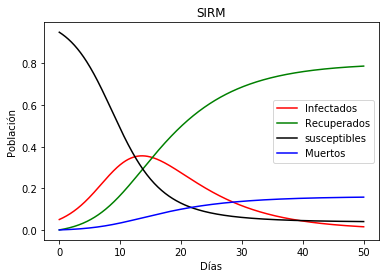

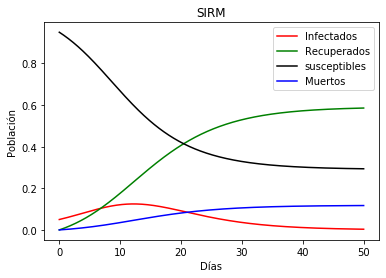

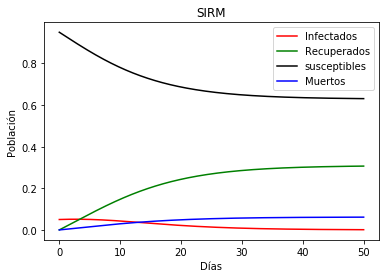

In [19]:
principal1(0.4, 0.1, 50, 0.1)
principal1(0.4, 0.2, 50, 0.1)
principal1(0.4, 0.3, 50, 0.1)

se observa que para $\beta$ fijo y a medida que $\gamma$ aumenta, la curva de infectados y muertos disminuye. 

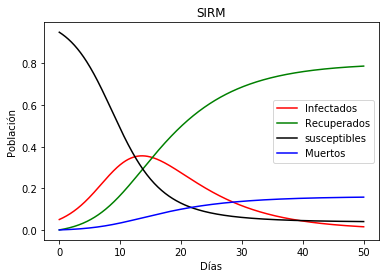

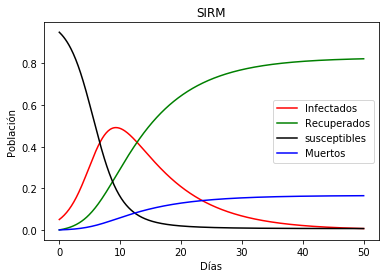

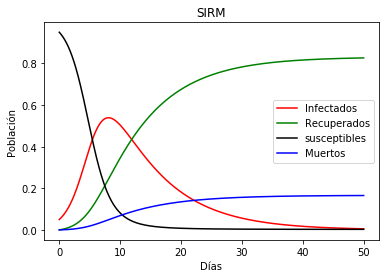

In [20]:
principal1(0.4, 0.1, 50, 0.1)
principal1(0.6, 0.1, 50, 0.1)
principal1(0.7, 0.1, 50, 0.1)

se observa que para $\gamma$ fijo y a medida que $\beta$ aumenta, la curva de infectados aumenta y la de muertos no varia, pues no depende de $\beta$. 